In [2]:
import cv2
import matplotlib.pyplot as plt

 # [1] Display rgb image matplotlib

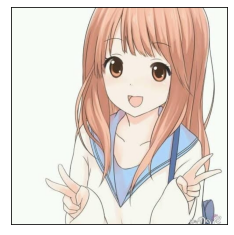

In [3]:
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

 # [2] Display images using other library not opencv

In [7]:
from PIL import Image         # RGB  not as Opencv BGR
img = Image.open('image.jpg')  
img.show()
img.save('saved.jpg')

 # [3] Download any image or video (not pytube) using url

In [65]:
import requests

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20201211190257/FreeOnlineScreenRecorderProject1.mp4?_=1'

r = requests.get(url, stream = True)

with open("Saved.mp4","wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:
            pdf.write(chunk)

In [64]:
import urllib.request

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20201211190257/FreeOnlineScreenRecorderProject1.mp4?_=1'
name = 'my_image.mp4'

urllib.request.urlretrieve(url, name)

('my_image.mp4', <http.client.HTTPMessage at 0x2888590a280>)

In [53]:
from pytube import YouTube
import os
from pathlib import Path

link = input("Enter link here: ")

url = YouTube(link)

print("downloading....")

video = url.streams.get_highest_resolution()

Enter link here: https://www.youtube.com/watch?v=Ige-YPaQQRQ
downloading....


 # 

 # [4] Exercise

 ### Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [3]:
model = LinearRegression()

In [4]:
year = df.drop('per capita income (US$)', axis= 1)
income = df['per capita income (US$)']

In [5]:
model.fit(year, income)

LinearRegression()

In [7]:
model.score(year, income)

0.890916917957032

In [8]:
model.predict([[2020]])

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

 # [5] Exercise

 ### In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

### 2 yr experience, 9 test score, 6 interview score

### 12 yr experience, 10 test score, 10 interview score

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
df.experience.fillna('zero', inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [37]:
def word2int(w):
    numbers = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
               "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
               "sixteen", "seventeen", "eighteen", "nineteen"]
    if w in numbers:
        return numbers.index(w)

In [38]:
df.experience = df.experience.apply(word2int)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [39]:
print(df['test_score(out of 10)'].mean())
df['test_score(out of 10)'].median()

7.857142857142857


8.0

In [40]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [41]:
x = df.drop('salary($)', axis=1)
y = df['salary($)']

In [42]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [43]:
model.predict([[2,9,6]])

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [45]:
model.predict([[12,10,10]])

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])